In [231]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [166]:
from pathlib import Path

In [167]:
print(Path.cwd())

C:\Users\USER\Desktop\Python Projects\ml-studies\src\ml_studies


In [168]:
script_dir = Path.cwd()

In [169]:
csv_file_path = script_dir / "datasets" / "Global_Cybersecurity_Threats_2015-2024.csv"

In [170]:
df = pd.read_csv(csv_file_path)

In [171]:
df.fillna(value=0)

,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours)
0,China,2019,Phishing,Education,80.53,773169,Hacker Group,Unpatched Software,VPN,63
1,China,2019,Ransomware,Retail,62.19,295961,Hacker Group,Unpatched Software,Firewall,71
2,India,2017,Man-in-the-Middle,IT,38.65,605895,Hacker Group,Weak Passwords,VPN,20
3,UK,2024,Ransomware,Telecommunications,41.44,659320,Nation-state,Social Engineering,AI-based Detection,7
4,Germany,2018,Man-in-the-Middle,IT,74.41,810682,Insider,Social Engineering,VPN,68
...,...,...,...,...,...,...,...,...,...,...
2995,UK,2021,Ransomware,Government,51.42,190694,Unknown,Social Engineering,Firewall,52
2996,Brazil,2023,SQL Injection,Telecommunications,30.28,892843,Hacker Group,Zero-day,VPN,26
2997,Brazil,2017,SQL Injection,IT,32.97,734737,Nation-state,Weak Passwords,AI-based Detection,30
2998,UK,2022,SQL Injection,IT,32.17,379954,Insider,Unpatched Software,Firewall,9


In [172]:
print(df.columns)

Index(['Country', 'Year', 'Attack Type', 'Target Industry',
       'Financial Loss (in Million $)', 'Number of Affected Users',
       'Attack Source', 'Security Vulnerability Type',
       'Defense Mechanism Used', 'Incident Resolution Time (in Hours)'],
      dtype='object')


In [173]:
df_attack_summary = df[['Country', 'Year', 'Attack Type', 'Target Industry', 'Attack Source', 'Security Vulnerability Type', 'Defense Mechanism Used']]

In [176]:
print(type(df_attack_summary))

<class 'pandas.core.frame.DataFrame'>


In [179]:
for column in df_attack_summary.columns:
    print(f"Column: {df_attack_summary[column].value_counts().sort_index()}")
    print("-")

Column: Country
Australia    297
Brazil       310
China        281
France       305
Germany      291
India        308
Japan        305
Russia       295
UK           321
USA          287
Name: count, dtype: int64
-
Column: Year
2015    277
2016    285
2017    319
2018    310
2019    263
2020    315
2021    299
2022    318
2023    315
2024    299
Name: count, dtype: int64
-
Column: Attack Type
DDoS                 531
Malware              485
Man-in-the-Middle    459
Phishing             529
Ransomware           493
SQL Injection        503
Name: count, dtype: int64
-
Column: Target Industry
Banking               445
Education             419
Government            403
Healthcare            429
IT                    478
Retail                423
Telecommunications    403
Name: count, dtype: int64
-
Column: Attack Source
Hacker Group    686
Insider         752
Nation-state    794
Unknown         768
Name: count, dtype: int64
-
Column: Security Vulnerability Type
Social Engineering    747
U

In [110]:
df_financial_impact =  pd.concat(df['Financial Loss (in Million $)'], [df_attack_summary], axis=1)

In [180]:
for column in df_financial_impact.columns:
    if column == 'Financial Loss (in Million $)':
       continue
    print(f"Column: {df_financial_impact.groupby(column)['Financial Loss (in Million $)'].sum()}")
    print("-")

Column: Country
Australia    15403.00
Brazil       15782.62
China        13714.47
France       14972.28
Germany      15793.24
India        14566.12
Japan        15197.34
Russia       14734.73
UK           16502.99
USA          14812.12
Name: Financial Loss (in Million $), dtype: float64
-
Column: Year
2015    14510.21
2016    13947.26
2017    16261.68
2018    14720.48
2019    13134.69
2020    15767.95
2021    15873.41
2022    15870.86
2023    15958.08
2024    15434.29
Name: Financial Loss (in Million $), dtype: float64
-
Column: Attack Type
DDoS                 27630.92
Malware              23967.95
Man-in-the-Middle    23550.87
Phishing             26693.29
Ransomware           24479.32
SQL Injection        25156.56
Name: Financial Loss (in Million $), dtype: float64
-
Column: Target Industry
Banking               22772.39
Education             20071.43
Government            21205.33
Healthcare            21041.29
IT                    24809.83
Retail                21119.55
Telecommu

In [226]:
def impact_analysis(categories, values):

    if isinstance(values, pd.Series):
        values_df = pd.DataFrame(values)
    else:
        values_df = values
    
    df_impact_analysis =  pd.concat([categories, values_df], axis=1)
    values_column_name = values_df.columns[0]
    
    for column in categories.columns:

        if column == values_column_name:
          continue
        print(f"Sum of overall impact by: {df_impact_analysis.groupby(column)[values_column_name].sum()}")
        print("-")
        print(f" Stats of overall impact by: {df_impact_analysis.groupby(column)[values_column_name].describe()}")
        print("___________")

    return df_impact_analysis
 
        
        

In [227]:
df_financial_loss = impact_analysis(df_attack_summary, df['Financial Loss (in Million $)'])

Sum of overall impact by: Country
Australia    15403.00
Brazil       15782.62
China        13714.47
France       14972.28
Germany      15793.24
India        14566.12
Japan        15197.34
Russia       14734.73
UK           16502.99
USA          14812.12
Name: Financial Loss (in Million $), dtype: float64
-
 Stats of overall impact by:            count       mean        std   min     25%     50%      75%    max
Country                                                                     
Australia  297.0  51.861953  29.554957  0.75  25.900  50.640  80.1100  99.99
Brazil     310.0  50.911677  29.611140  1.01  24.405  53.985  76.2225  99.90
China      281.0  48.805943  28.289479  1.05  22.710  49.190  71.9000  99.99
France     305.0  49.089443  28.422801  0.95  25.750  48.770  75.1300  99.78
Germany    291.0  54.272302  28.797269  0.54  31.180  55.500  79.4800  99.98
India      308.0  47.292597  29.283867  0.60  20.725  43.280  71.7150  99.72
Japan      305.0  49.827344  28.294062  1.72  2

In [228]:
df_affected_users = impact_analysis(df_attack_summary, df['Number of Affected Users'])

Sum of overall impact by: Country
Australia    150011830
Brazil       168806980
China        139580938
France       156229142
Germany      147675358
India        149178659
Japan        148711814
Russia       152191835
UK           157464983
USA          144200870
Name: Number of Affected Users, dtype: int64
-
 Stats of overall impact by:            count           mean            std     min       25%       50%  \
Country                                                                      
Australia  297.0  505090.336700  298521.913252  6670.0  235062.0  497035.0   
Brazil     310.0  544538.645161  283404.972666   984.0  313639.0  563414.5   
China      281.0  496729.316726  296745.508627  4814.0  240400.0  500521.0   
France     305.0  512226.695082  284306.850973   424.0  276541.0  517640.0   
Germany    291.0  507475.457045  291287.903234  1326.0  257827.5  506625.0   
India      308.0  484346.295455  293206.046577   586.0  234048.0  466321.5   
Japan      305.0  487579.718033  286

In [229]:
df_resolution_time = impact_analysis(df_attack_summary, df['Incident Resolution Time (in Hours)'])

Sum of overall impact by: Country
Australia    10835
Brazil       11706
China        10509
France       11046
Germany      10481
India        11067
Japan        11315
Russia       10483
UK           11853
USA          10133
Name: Incident Resolution Time (in Hours), dtype: int64
-
 Stats of overall impact by:            count       mean        std  min   25%   50%   75%   max
Country                                                            
Australia  297.0  36.481481  20.416454  1.0  19.0  37.0  54.0  72.0
Brazil     310.0  37.761290  20.709763  1.0  21.0  38.0  56.0  72.0
China      281.0  37.398577  20.112661  1.0  20.0  37.0  55.0  72.0
France     305.0  36.216393  21.026277  2.0  17.0  36.0  55.0  72.0
Germany    291.0  36.017182  20.429096  1.0  19.0  36.0  54.0  72.0
India      308.0  35.931818  20.671903  1.0  18.0  36.5  54.0  72.0
Japan      305.0  37.098361  21.012610  1.0  19.0  40.0  56.0  72.0
Russia     295.0  35.535593  20.635266  1.0  19.0  35.0  54.0  72.0
UK       

In [232]:
sns.set_theme(style="whitegrid")

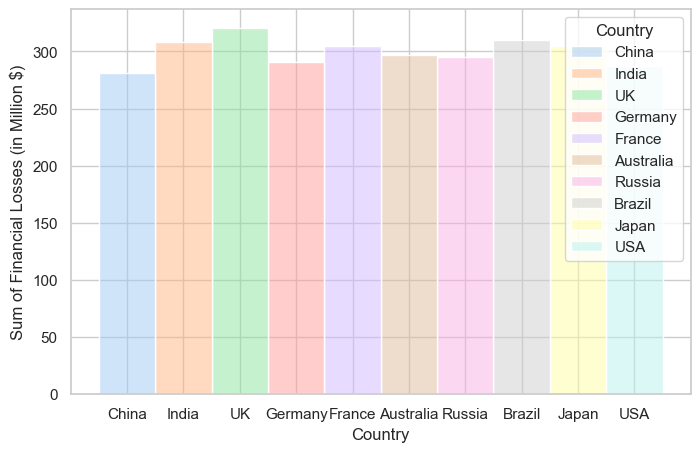

In [262]:
plt.figure(figsize=(8,5))
sns.histplot(data=df_financial_loss, x='Country', hue='Country', palette='pastel', kde=True)
plt.title = ('Financial Impact')
plt.xlabel('Country')
plt.ylabel('Sum of Financial Losses (in Million $)')
plt.show()

In [257]:
type(df_financial_loss['Financial Loss (in Million $)'][1])

numpy.float64

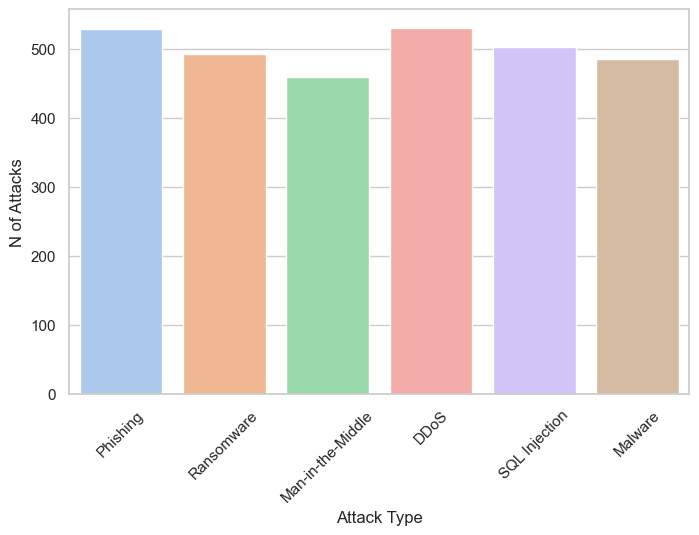

In [259]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df_financial_loss, x='Attack Type', hue='Attack Type', palette='pastel')
plt.title = ('N of Attacks, by Attack Type')
plt.xlabel('Attack Type')
plt.ylabel('N of Attacks')
plt.xticks(rotation=45) # Rotate x-axis labels if they overlap
plt.show()

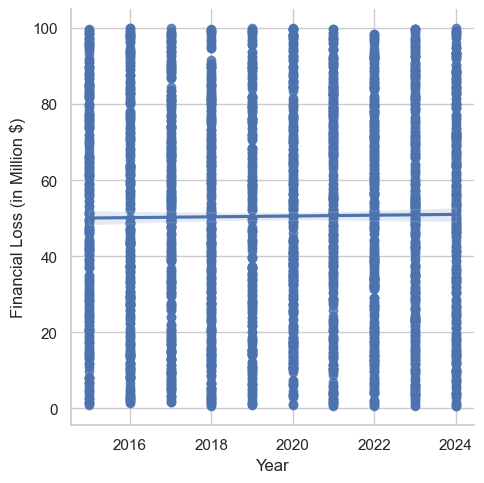

In [258]:
sns.lmplot(data=df_financial_loss, x='Year', y='Financial Loss (in Million $)')